In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

data = pd.read_csv("../data/titanic.csv")
print(f"Dataset shape: {data.shape}")
print("\nFirst few rows:")
data.head()

Dataset shape: (891, 12)

First few rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print("=== DATASET INFORMATION ===")
print(f"Total passengers: {len(data)}")
print(f"Number of features: {len(data.columns)}")
print("\n=== DATA TYPES ===")
print(data.dtypes)
print("\n=== COLUMNS ===")
print(data.columns.tolist())

=== DATASET INFORMATION ===
Total passengers: 891
Number of features: 12

=== DATA TYPES ===
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

=== COLUMNS ===
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [7]:
print("=== MISSING VALUES ===")
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Values'] > 0])

=== MISSING VALUES ===
          Missing Values  Percentage
Age                  177   19.865320
Cabin                687   77.104377
Embarked               2    0.224467


In [8]:
print("=== NUMERICAL FEATURES STATISTICS ===")
num_cols = data.select_dtypes(include=[np.number]).columns
print(data[num_cols].describe().T)

print("\n=== CATEGORICAL FEATURES STATISTICS ===")
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"\n{col}:")
    print(data[col].value_counts().head())

=== NUMERICAL FEATURES STATISTICS ===
             count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292  

=== CATEGORICAL FEATURES STATISTICS ===

Name:
Name
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley 

=== SURVIVAL OVERVIEW ===


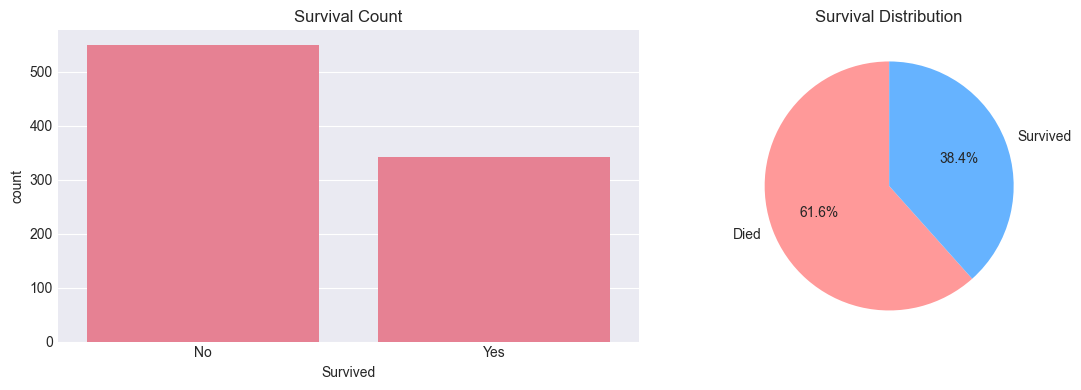

Survived: 342 (38.38%)
Died: 549 (61.62%)


In [9]:
print("=== SURVIVAL OVERVIEW ===")
survival_counts = data['Survived'].value_counts()
survival_percent = data['Survived'].value_counts(normalize=True) * 100

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Count plot
sns.countplot(data=data, x='Survived', ax=axes[0])
axes[0].set_title('Survival Count')
axes[0].set_xticklabels(['No', 'Yes'])

# Pie chart
labels = ['Died', 'Survived']
colors = ['#ff9999', '#66b3ff']
axes[1].pie(survival_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Survival Distribution')

plt.tight_layout()
plt.show()

print(f"Survived: {survival_counts[1]} ({survival_percent[1]:.2f}%)")
print(f"Died: {survival_counts[0]} ({survival_percent[0]:.2f}%)")

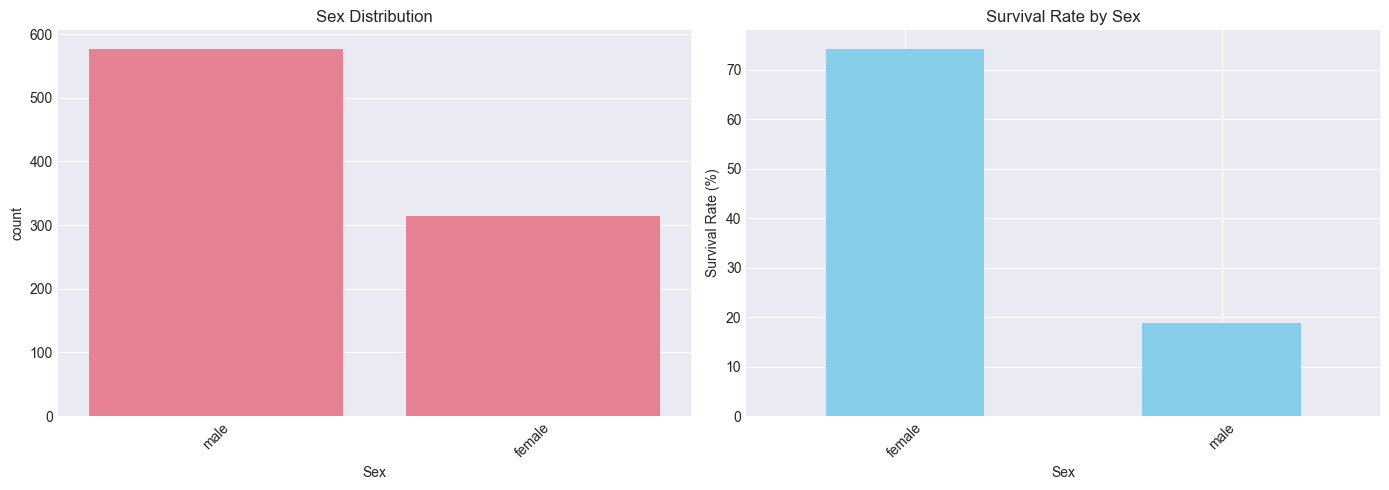


Sex Survival Statistics:
  male: 109/577 survived (18.9%)
  female: 233/314 survived (74.2%)


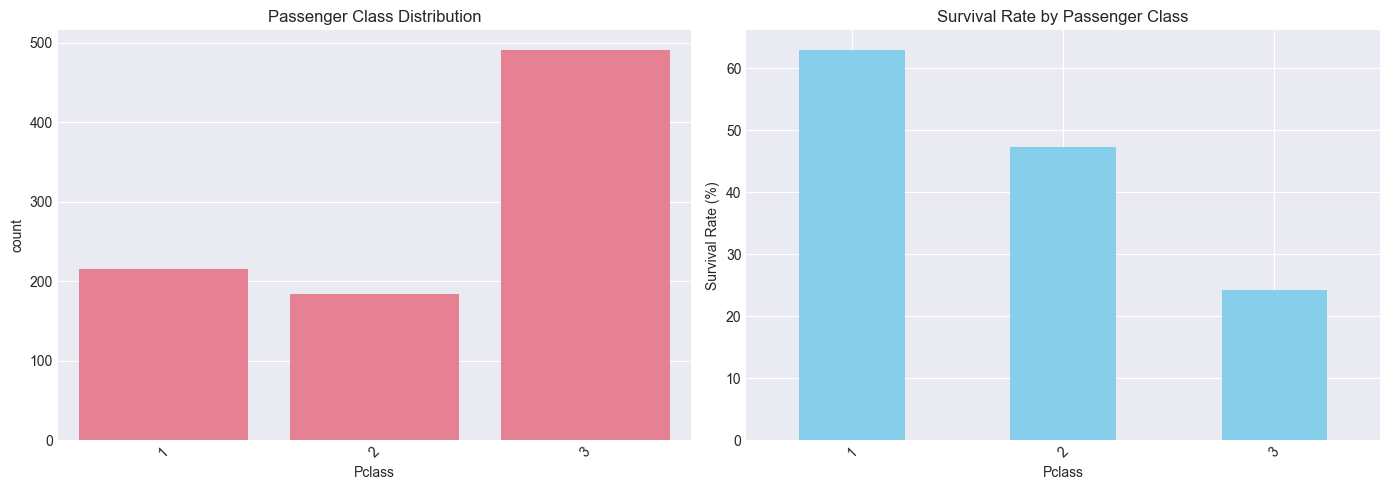


Passenger Class Survival Statistics:
  3: 119/491 survived (24.2%)
  1: 136/216 survived (63.0%)
  2: 87/184 survived (47.3%)


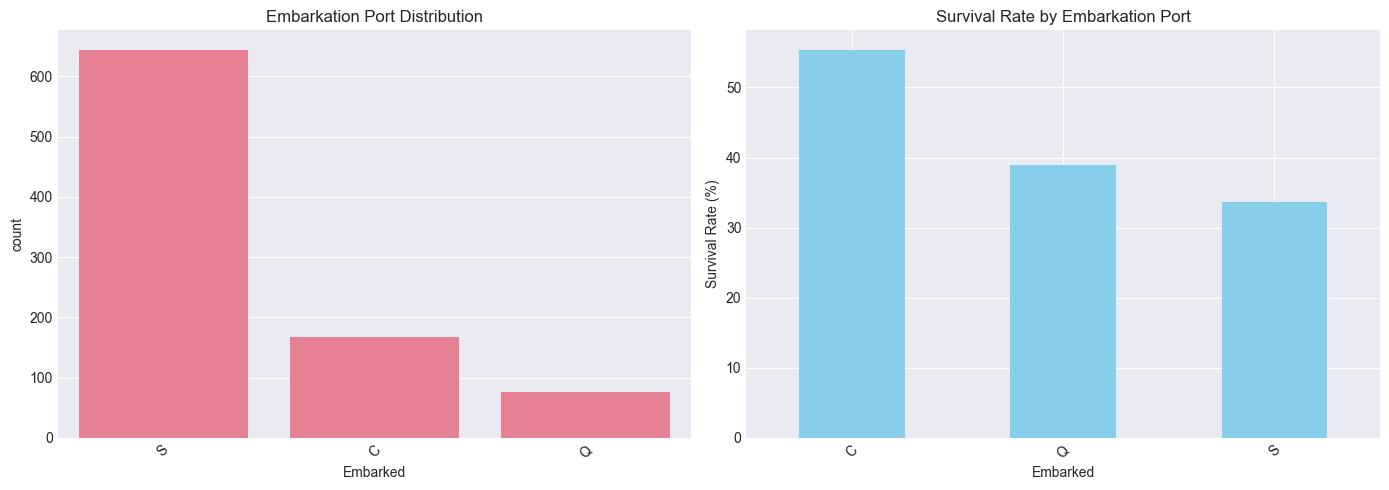


Embarkation Port Survival Statistics:
  S: 217/644 survived (33.7%)
  C: 93/168 survived (55.4%)
  Q: 30/77 survived (39.0%)
  nan: 0/0 survived (0.0%)


In [10]:
# Function to plot categorical variables against survival
def plot_categorical_survival(col, title):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Count plot
    sns.countplot(data=data, x=col, ax=axes[0])
    axes[0].set_title(f'{title} Distribution')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Survival rate by category
    survival_rate = data.groupby(col)['Survived'].mean() * 100
    survival_rate.plot(kind='bar', ax=axes[1], color='skyblue')
    axes[1].set_title(f'Survival Rate by {title}')
    axes[1].set_ylabel('Survival Rate (%)')
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\n{title} Survival Statistics:")
    for category in data[col].unique():
        cat_data = data[data[col] == category]
        survived = cat_data['Survived'].sum()
        total = len(cat_data)
        rate = (survived / total) * 100 if total > 0 else 0
        print(f"  {category}: {survived}/{total} survived ({rate:.1f}%)")

# Analyze Sex
plot_categorical_survival('Sex', 'Sex')

# Analyze Pclass
plot_categorical_survival('Pclass', 'Passenger Class')

# Analyze Embarked
plot_categorical_survival('Embarked', 'Embarkation Port')

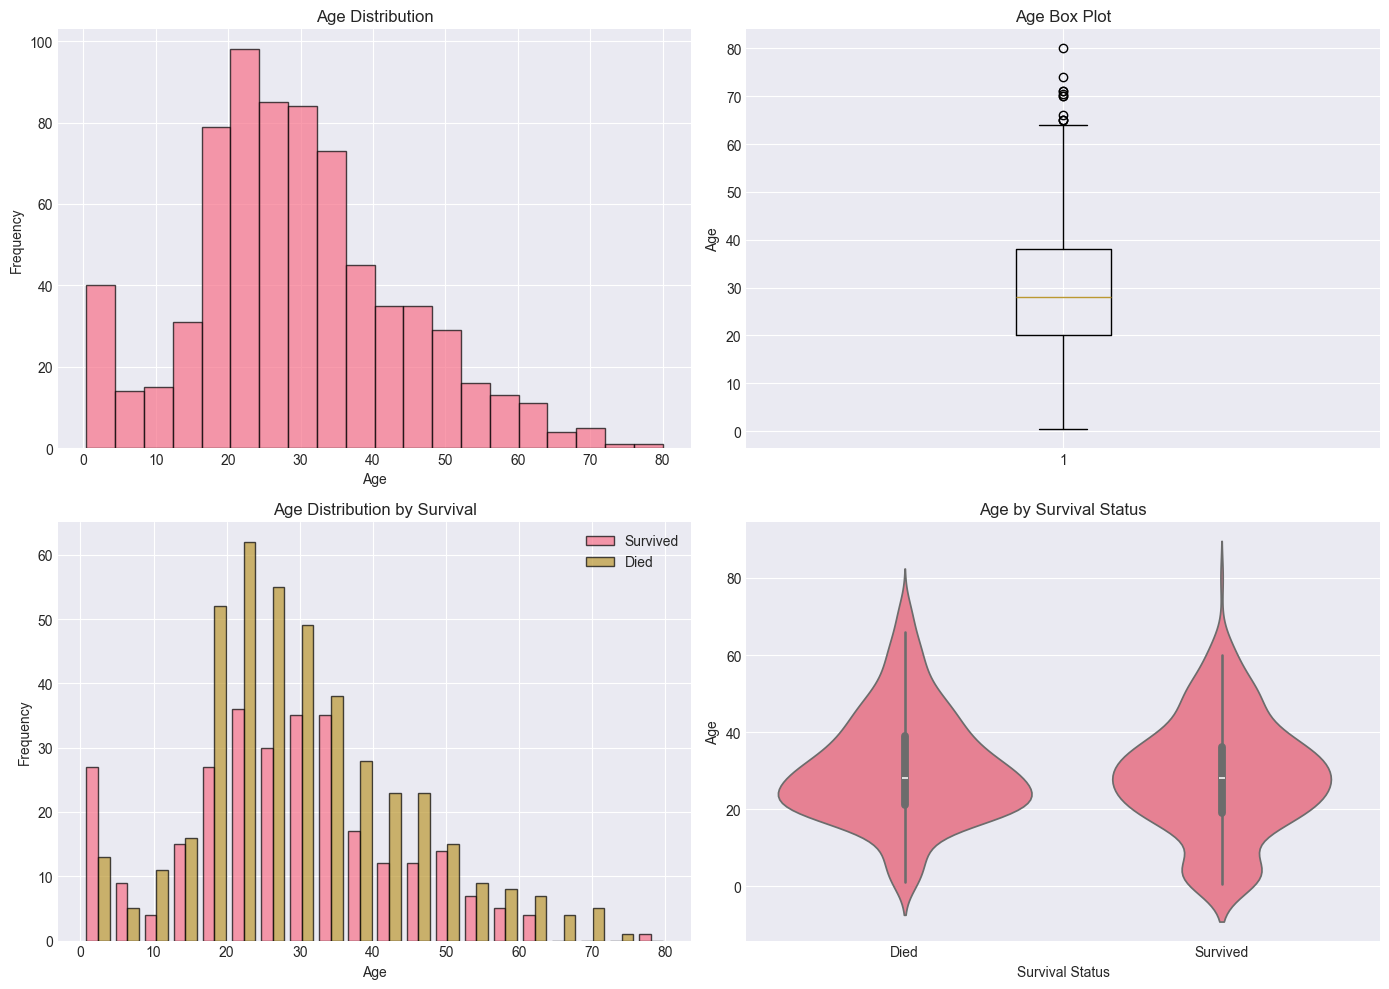


Age Statistics:
Mean: 29.70
Median: 28.00
Std Dev: 14.53
Min: 0.42
Max: 80.00

Age by Survival:
  Died: Mean=30.63, Median=28.00
  Survived: Mean=28.34, Median=28.00


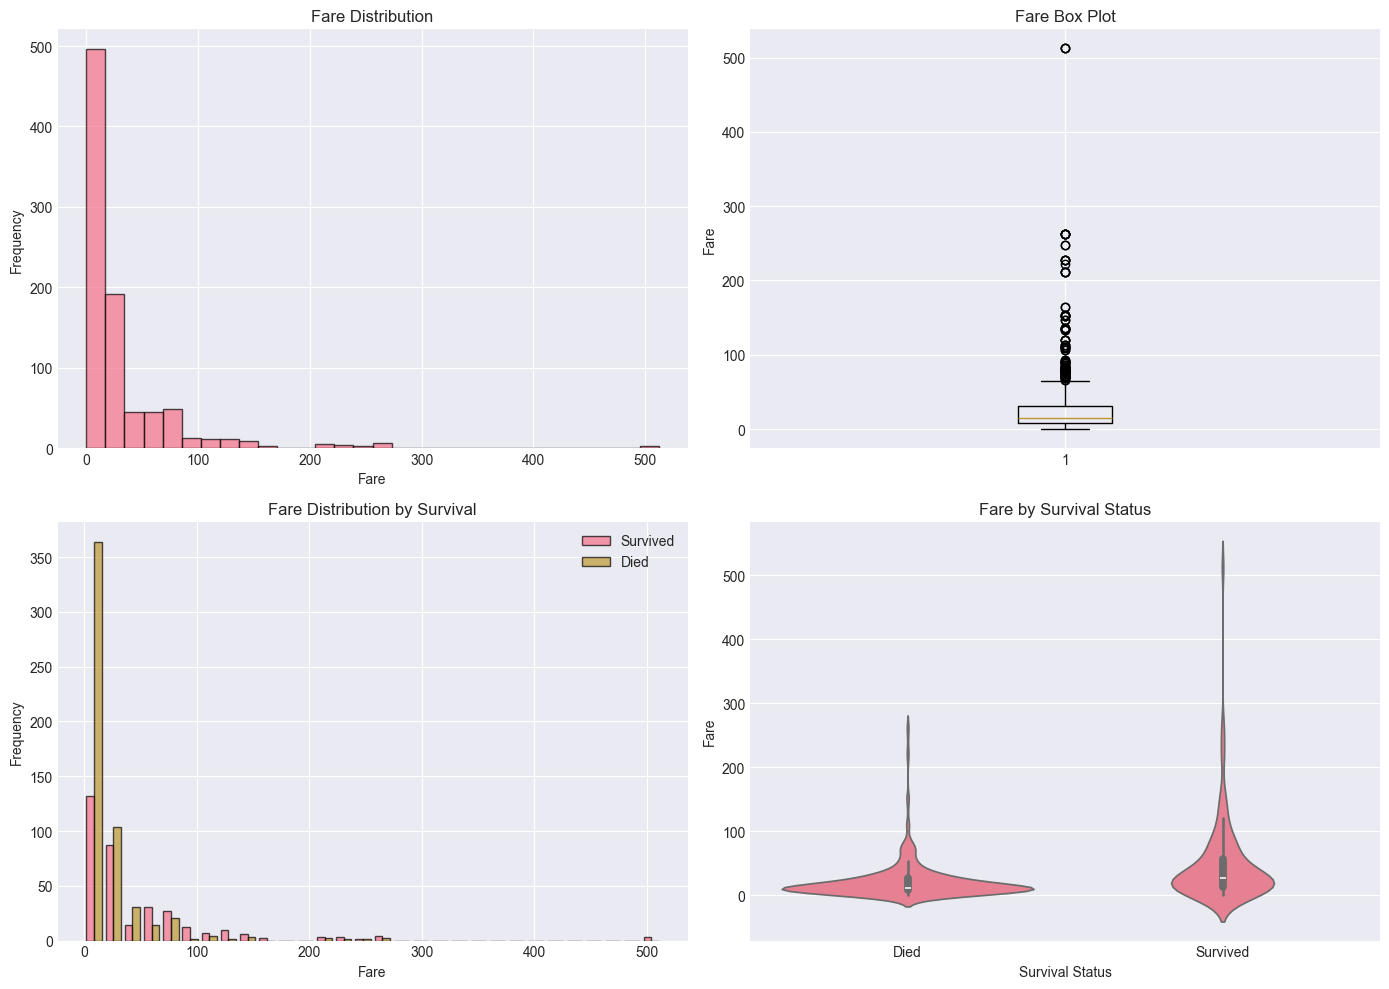


Fare Statistics:
Mean: 32.20
Median: 14.45
Std Dev: 49.69
Min: 0.00
Max: 512.33

Fare by Survival:
  Died: Mean=22.12, Median=10.50
  Survived: Mean=48.40, Median=26.00


In [11]:
# Function to plot numerical variables
def plot_numerical_analysis(col, title, bins=30):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Histogram
    axes[0, 0].hist(data[col].dropna(), bins=bins, edgecolor='black', alpha=0.7)
    axes[0, 0].set_title(f'{title} Distribution')
    axes[0, 0].set_xlabel(title)
    axes[0, 0].set_ylabel('Frequency')
    
    # Box plot
    axes[0, 1].boxplot(data[col].dropna())
    axes[0, 1].set_title(f'{title} Box Plot')
    axes[0, 1].set_ylabel(title)
    
    # Distribution by survival
    survived = data[data['Survived'] == 1][col]
    died = data[data['Survived'] == 0][col]

    axes[1, 0].hist([survived.dropna(), died.dropna()], 
                   bins=bins, label=['Survived', 'Died'], 
                   alpha=0.7, edgecolor='black')
    axes[1, 0].set_title(f'{title} Distribution by Survival')
    axes[1, 0].set_xlabel(title)
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].legend()
    
    # Violin plot
    sns.violinplot(data=data, x='Survived', y=col, ax=axes[1, 1])
    axes[1, 1].set_title(f'{title} by Survival Status')
    axes[1, 1].set_xticklabels(['Died', 'Survived'])
    axes[1, 1].set_xlabel('Survival Status')
    axes[1, 1].set_ylabel(title)
    
    plt.tight_layout()
    plt.show()
    
    # Statistics
    print(f"\n{title} Statistics:")
    print(f"Mean: {data[col].mean():.2f}")
    print(f"Median: {data[col].median():.2f}")
    print(f"Std Dev: {data[col].std():.2f}")
    print(f"Min: {data[col].min():.2f}")
    print(f"Max: {data[col].max():.2f}")
    
    # Survival statistics
    print(f"\n{title} by Survival:")
    for status in [0, 1]:
        subset = data[data['Survived'] == status][col]
        print(f"  {'Died' if status == 0 else 'Survived'}: "
              f"Mean={subset.mean():.2f}, Median={subset.median():.2f}")

# Analyze Age
plot_numerical_analysis('Age', 'Age', bins=20)

# Analyze Fare
plot_numerical_analysis('Fare', 'Fare', bins=30)

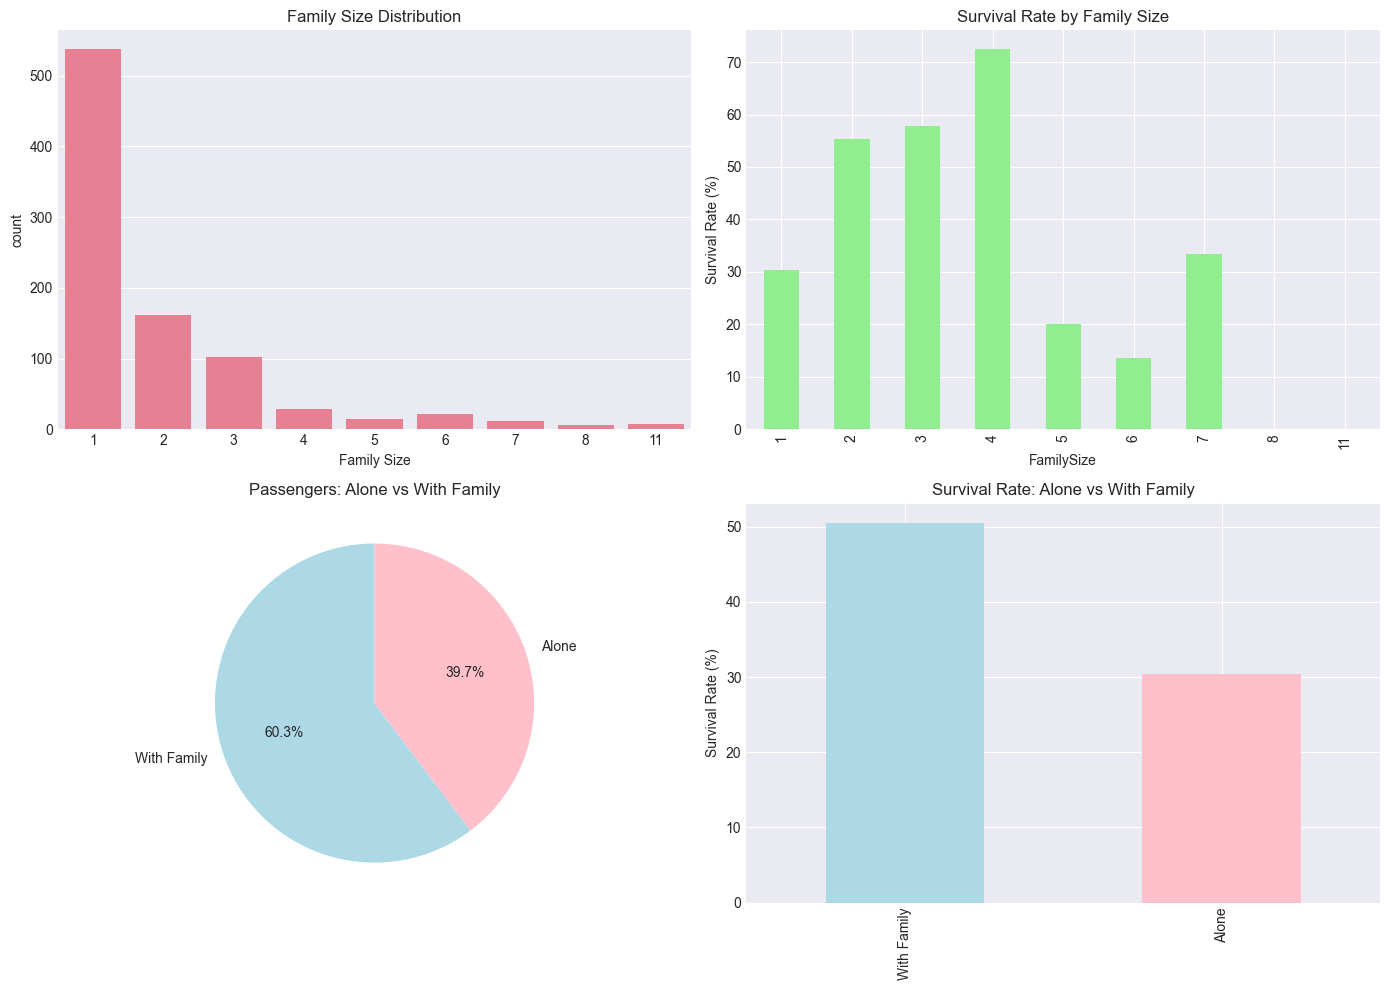


Family Statistics:
Family Size 1: 537 passengers, 30.4% survived
Family Size 2: 161 passengers, 55.3% survived
Family Size 3: 102 passengers, 57.8% survived
Family Size 4: 29 passengers, 72.4% survived
Family Size 5: 15 passengers, 20.0% survived
Family Size 6: 22 passengers, 13.6% survived
Family Size 7: 12 passengers, 33.3% survived
Family Size 8: 6 passengers, 0.0% survived
Family Size 11: 7 passengers, 0.0% survived


In [12]:
# Create family size feature
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['IsAlone'] = (data['FamilySize'] == 1).astype(int)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Family size distribution
sns.countplot(data=data, x='FamilySize', ax=axes[0, 0])
axes[0, 0].set_title('Family Size Distribution')
axes[0, 0].set_xlabel('Family Size')

# Family size vs survival
family_survival = data.groupby('FamilySize')['Survived'].mean() * 100
family_survival.plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Survival Rate by Family Size')
axes[0, 1].set_ylabel('Survival Rate (%)')

# Alone vs with family
alone_counts = data['IsAlone'].value_counts()
axes[1, 0].pie(alone_counts, labels=['With Family', 'Alone'], 
               autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
axes[1, 0].set_title('Passengers: Alone vs With Family')

# Survival by alone status
alone_survival = data.groupby('IsAlone')['Survived'].mean() * 100
alone_survival.index = ['With Family', 'Alone']
alone_survival.plot(kind='bar', ax=axes[1, 1], color=['lightblue', 'pink'])
axes[1, 1].set_title('Survival Rate: Alone vs With Family')
axes[1, 1].set_ylabel('Survival Rate (%)')

plt.tight_layout()
plt.show()

print("\nFamily Statistics:")
for size in sorted(data['FamilySize'].unique()):
    subset = data[data['FamilySize'] == size]
    rate = subset['Survived'].mean() * 100
    print(f"Family Size {size}: {len(subset)} passengers, {rate:.1f}% survived")

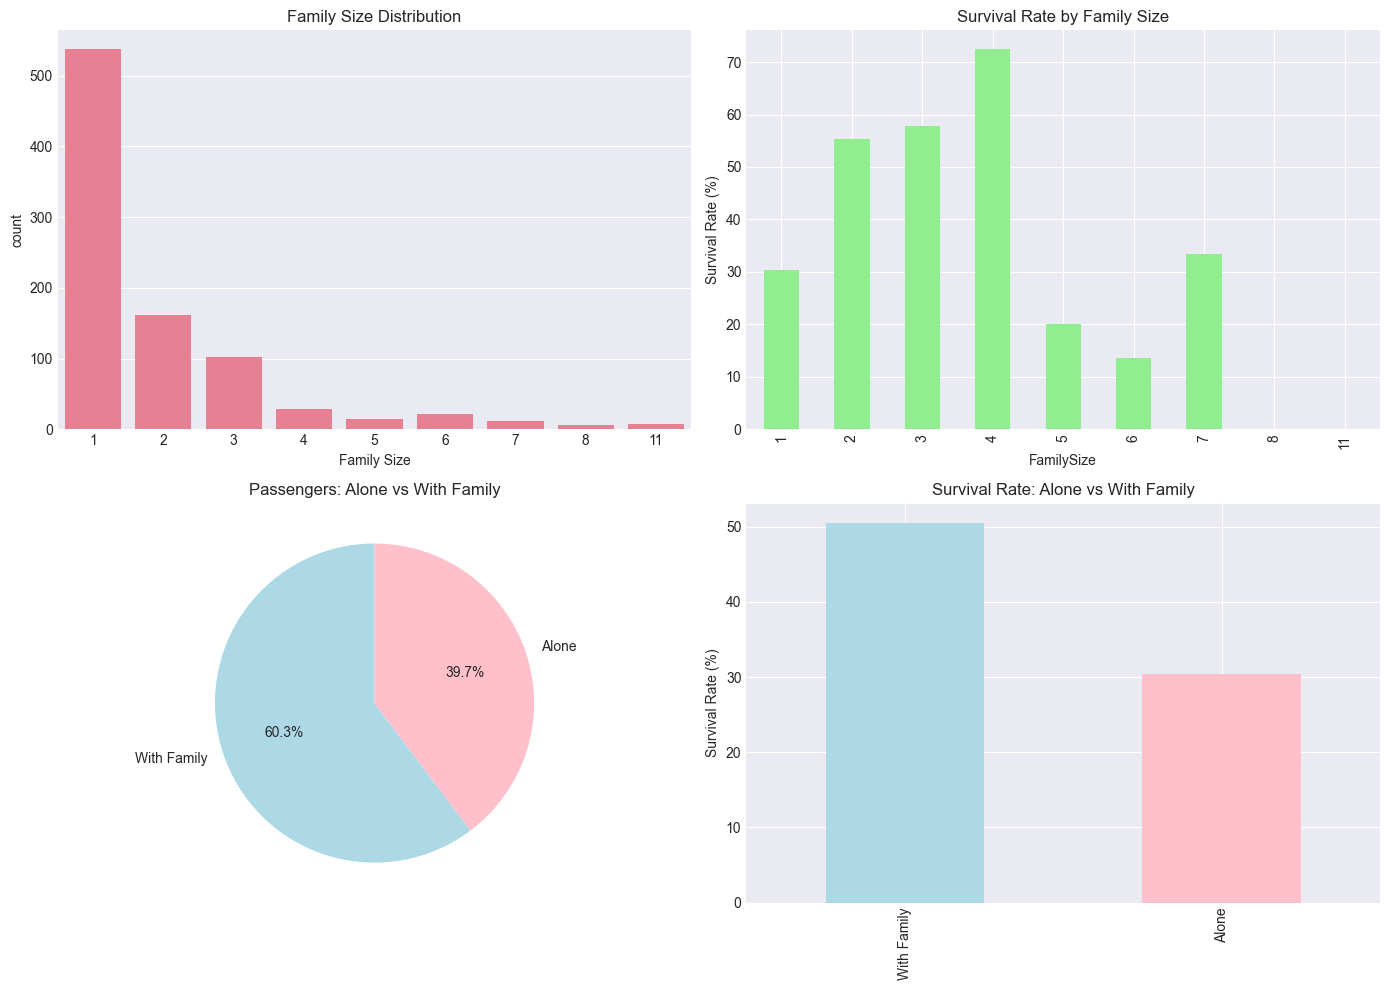


Family Statistics:
Family Size 1: 537 passengers, 30.4% survived
Family Size 2: 161 passengers, 55.3% survived
Family Size 3: 102 passengers, 57.8% survived
Family Size 4: 29 passengers, 72.4% survived
Family Size 5: 15 passengers, 20.0% survived
Family Size 6: 22 passengers, 13.6% survived
Family Size 7: 12 passengers, 33.3% survived
Family Size 8: 6 passengers, 0.0% survived
Family Size 11: 7 passengers, 0.0% survived


In [14]:
# Create family size feature
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['IsAlone'] = (data['FamilySize'] == 1).astype(int)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Family size distribution
sns.countplot(data=data, x='FamilySize', ax=axes[0, 0])
axes[0, 0].set_title('Family Size Distribution')
axes[0, 0].set_xlabel('Family Size')

# Family size vs survival
family_survival = data.groupby('FamilySize')['Survived'].mean() * 100
family_survival.plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Survival Rate by Family Size')
axes[0, 1].set_ylabel('Survival Rate (%)')

# Alone vs with family
alone_counts = data['IsAlone'].value_counts()
axes[1, 0].pie(alone_counts, labels=['With Family', 'Alone'], 
               autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
axes[1, 0].set_title('Passengers: Alone vs With Family')

# Survival by alone status
alone_survival = data.groupby('IsAlone')['Survived'].mean() * 100
alone_survival.index = ['With Family', 'Alone']
alone_survival.plot(kind='bar', ax=axes[1, 1], color=['lightblue', 'pink'])
axes[1, 1].set_title('Survival Rate: Alone vs With Family')
axes[1, 1].set_ylabel('Survival Rate (%)')

plt.tight_layout()
plt.show()

print("\nFamily Statistics:")
for size in sorted(data['FamilySize'].unique()):
    subset = data[data['FamilySize'] == size]
    rate = subset['Survived'].mean() * 100
    print(f"Family Size {size}: {len(subset)} passengers, {rate:.1f}% survived")

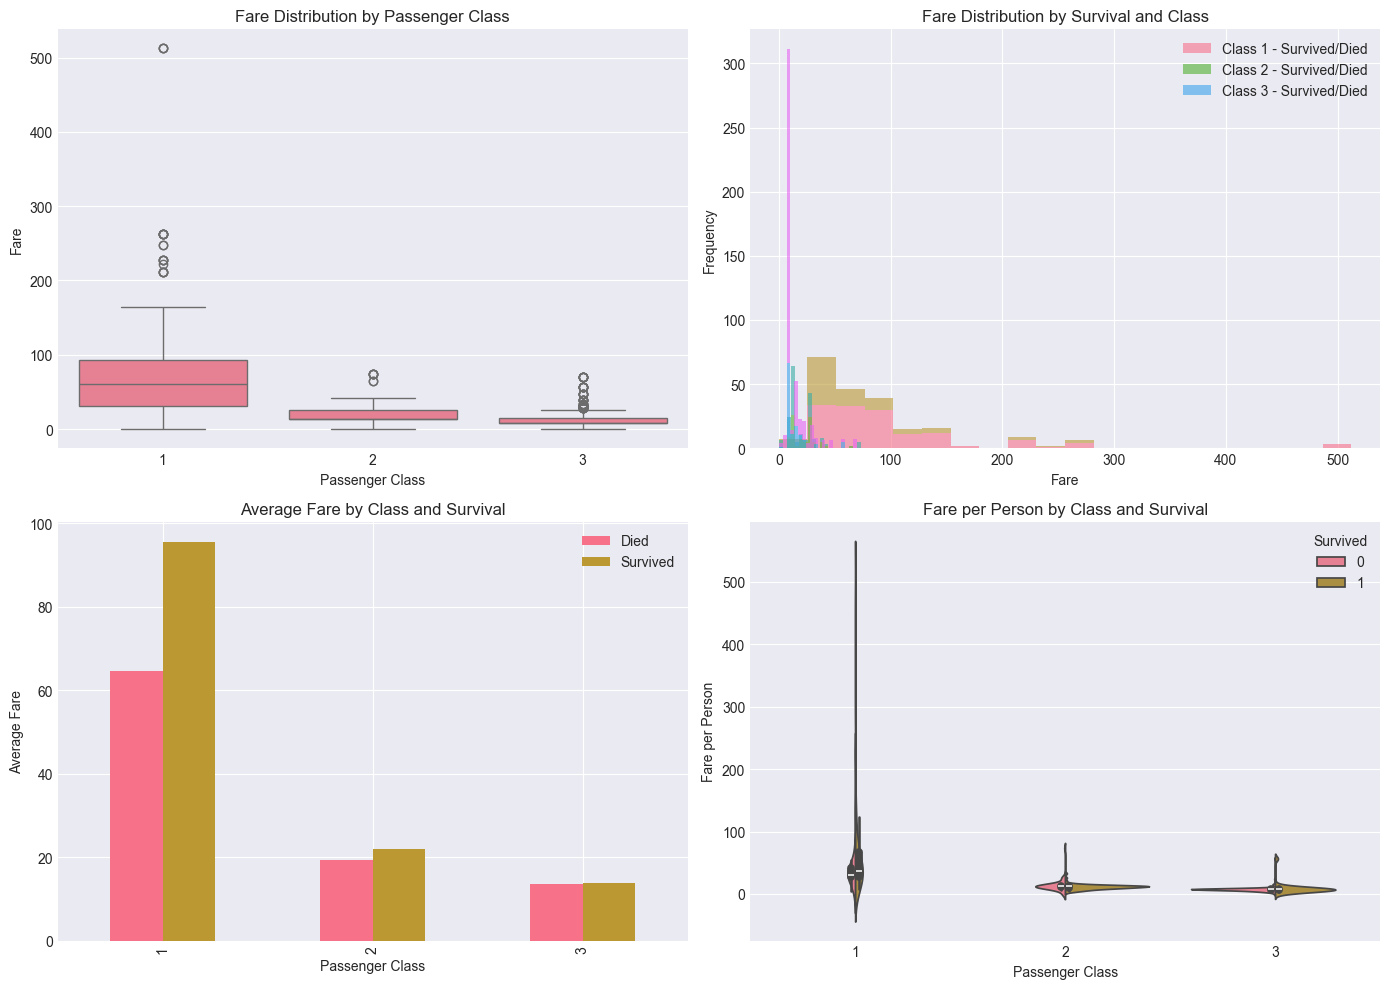

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Fare distribution by class
sns.boxplot(data=data, x='Pclass', y='Fare', ax=axes[0, 0])
axes[0, 0].set_title('Fare Distribution by Passenger Class')
axes[0, 0].set_xlabel('Passenger Class')
axes[0, 0].set_ylabel('Fare')

# Fare vs Survival by class
for pclass in [1, 2, 3]:
    subset = data[data['Pclass'] == pclass]
    survived_fare = subset[subset['Survived'] == 1]['Fare']
    died_fare = subset[subset['Survived'] == 0]['Fare']
    
    axes[0, 1].hist([survived_fare.dropna(), died_fare.dropna()], 
                   bins=20, label=f'Class {pclass} - Survived/Died',
                   alpha=0.6, stacked=True)
axes[0, 1].set_title('Fare Distribution by Survival and Class')
axes[0, 1].set_xlabel('Fare')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# Average fare by class and survival
fare_by_class_survival = data.groupby(['Pclass', 'Survived'])['Fare'].mean().unstack()
fare_by_class_survival.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Average Fare by Class and Survival')
axes[1, 0].set_xlabel('Passenger Class')
axes[1, 0].set_ylabel('Average Fare')
axes[1, 0].legend(['Died', 'Survived'])

# Fare per person (accounting for family)
data['FarePerPerson'] = data['Fare'] / data['FamilySize']
sns.violinplot(data=data, x='Pclass', y='FarePerPerson', hue='Survived', 
               split=True, ax=axes[1, 1])
axes[1, 1].set_title('Fare per Person by Class and Survival')
axes[1, 1].set_xlabel('Passenger Class')
axes[1, 1].set_ylabel('Fare per Person')

plt.tight_layout()
plt.show()

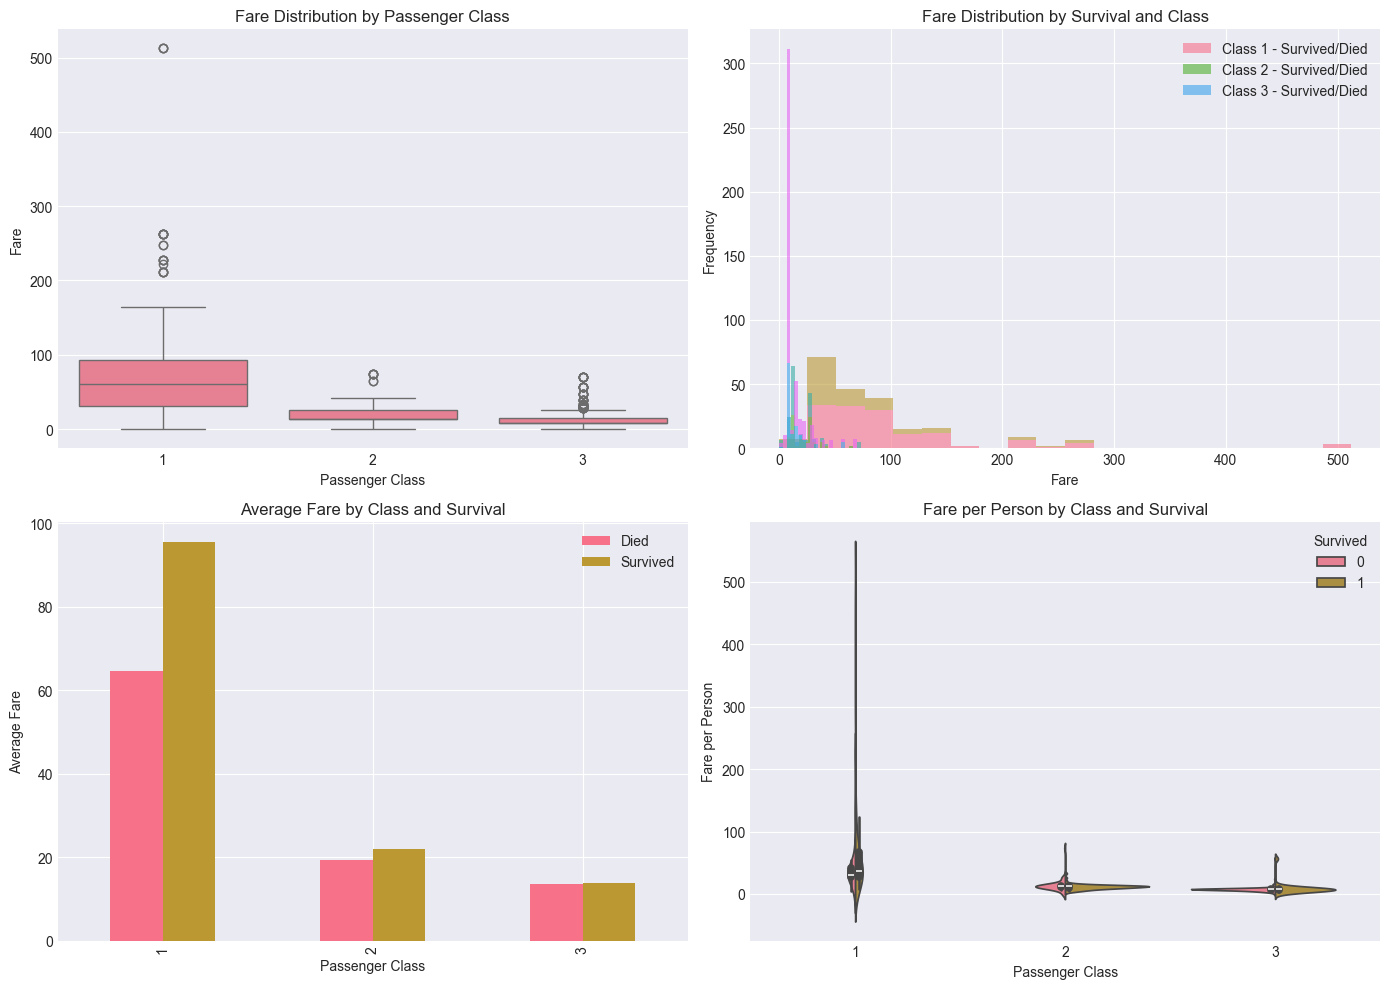

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Fare distribution by class
sns.boxplot(data=data, x='Pclass', y='Fare', ax=axes[0, 0])
axes[0, 0].set_title('Fare Distribution by Passenger Class')
axes[0, 0].set_xlabel('Passenger Class')
axes[0, 0].set_ylabel('Fare')

# Fare vs Survival by class
for pclass in [1, 2, 3]:
    subset = data[data['Pclass'] == pclass]
    survived_fare = subset[subset['Survived'] == 1]['Fare']
    died_fare = subset[subset['Survived'] == 0]['Fare']
    
    axes[0, 1].hist([survived_fare.dropna(), died_fare.dropna()], 
                   bins=20, label=f'Class {pclass} - Survived/Died',
                   alpha=0.6, stacked=True)
axes[0, 1].set_title('Fare Distribution by Survival and Class')
axes[0, 1].set_xlabel('Fare')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# Average fare by class and survival
fare_by_class_survival = data.groupby(['Pclass', 'Survived'])['Fare'].mean().unstack()
fare_by_class_survival.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Average Fare by Class and Survival')
axes[1, 0].set_xlabel('Passenger Class')
axes[1, 0].set_ylabel('Average Fare')
axes[1, 0].legend(['Died', 'Survived'])

# Fare per person (accounting for family)
data['FarePerPerson'] = data['Fare'] / data['FamilySize']
sns.violinplot(data=data, x='Pclass', y='FarePerPerson', hue='Survived', 
               split=True, ax=axes[1, 1])
axes[1, 1].set_title('Fare per Person by Class and Survival')
axes[1, 1].set_xlabel('Passenger Class')
axes[1, 1].set_ylabel('Fare per Person')

plt.tight_layout()
plt.show()

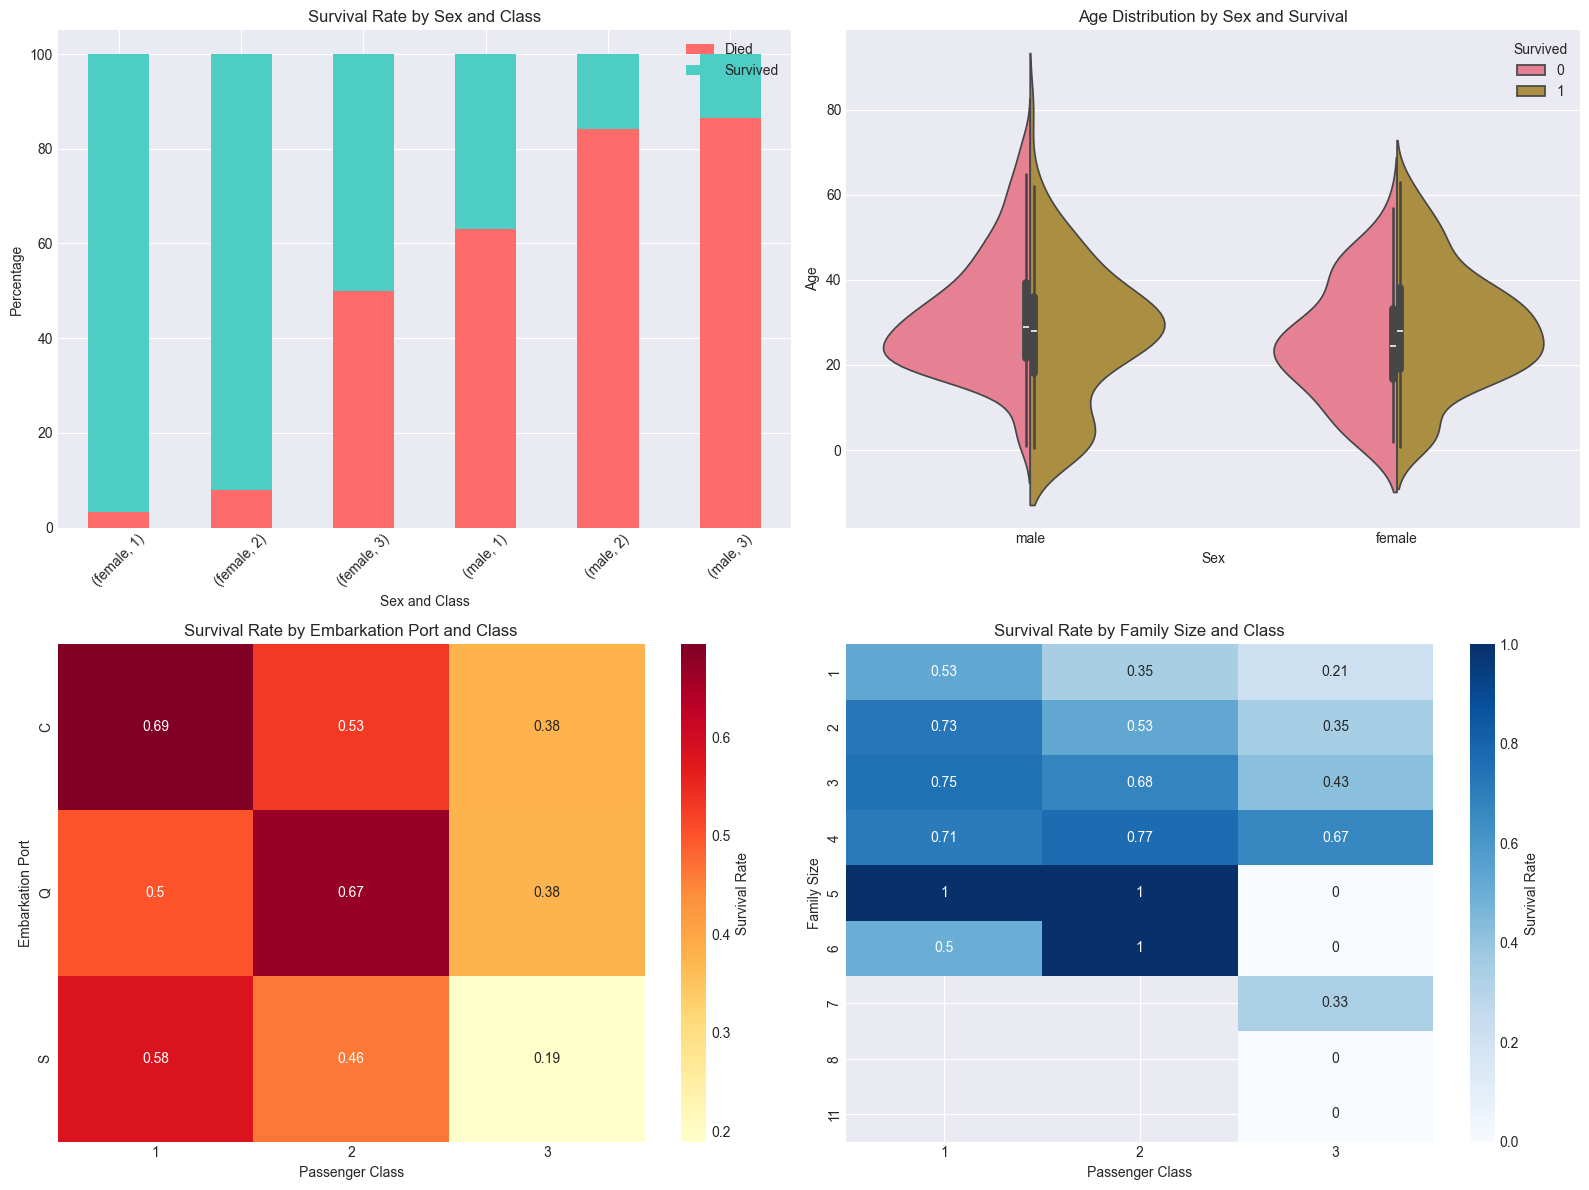

In [18]:
# Create a comprehensive cross-analysis
fig = plt.figure(figsize=(16, 12))

# 1. Sex, Class and Survival
ax1 = plt.subplot(2, 2, 1)
cross_sex_class = pd.crosstab([data['Sex'], data['Pclass']], data['Survived'], 
                              normalize='index') * 100
cross_sex_class.plot(kind='bar', ax=ax1, stacked=True, color=['#ff6b6b', '#4ecdc4'])
ax1.set_title('Survival Rate by Sex and Class')
ax1.set_xlabel('Sex and Class')
ax1.set_ylabel('Percentage')
ax1.legend(['Died', 'Survived'])
ax1.tick_params(axis='x', rotation=45)

# 2. Age, Sex and Survival
ax2 = plt.subplot(2, 2, 2)
sns.violinplot(data=data, x='Sex', y='Age', hue='Survived', split=True, ax=ax2)
ax2.set_title('Age Distribution by Sex and Survival')
ax2.set_xlabel('Sex')
ax2.set_ylabel('Age')

# 3. Embarkation, Class and Survival
ax3 = plt.subplot(2, 2, 3)
embark_class_survival = data.groupby(['Embarked', 'Pclass'])['Survived'].mean().unstack()
sns.heatmap(embark_class_survival, annot=True, cmap='YlOrRd', ax=ax3, cbar_kws={'label': 'Survival Rate'})
ax3.set_title('Survival Rate by Embarkation Port and Class')
ax3.set_xlabel('Passenger Class')
ax3.set_ylabel('Embarkation Port')

# 4. Family Size, Class and Survival
ax4 = plt.subplot(2, 2, 4)
family_class_survival = data.groupby(['FamilySize', 'Pclass'])['Survived'].mean().unstack()
sns.heatmap(family_class_survival, annot=True, cmap='Blues', ax=ax4, 
            cbar_kws={'label': 'Survival Rate'})
ax4.set_title('Survival Rate by Family Size and Class')
ax4.set_xlabel('Passenger Class')
ax4.set_ylabel('Family Size')

plt.tight_layout()
plt.show()

In [19]:
print("=== STATISTICAL SIGNIFICANCE TESTS ===")

# Chi-square test for categorical variables
from scipy.stats import chi2_contingency

def chi2_test(var1, var2):
    contingency = pd.crosstab(data[var1], data[var2])
    chi2, p, dof, expected = chi2_contingency(contingency)
    return chi2, p

print("\nChi-square tests for independence with Survival:")
variables = ['Sex', 'Pclass', 'Embarked', 'IsAlone']
for var in variables:
    chi2, p = chi2_test(var, 'Survived')
    print(f"{var} vs Survived: χ²={chi2:.2f}, p={p:.6f} "
          f"{'***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else 'NS'}")

# T-tests for numerical variables
from scipy.stats import ttest_ind

print("\nT-tests for numerical variables:")
numerical_vars = ['Age', 'Fare', 'FamilySize']
for var in numerical_vars:
    survived = data[data['Survived'] == 1][var].dropna()
    died = data[data['Survived'] == 0][var].dropna()
    t_stat, p_val = ttest_ind(survived, died, equal_var=False)
    print(f"{var}: t={t_stat:.2f}, p={p_val:.6f} "
          f"{'***' if p_val < 0.001 else '**' if p_val < 0.01 else '*' if p_val < 0.05 else 'NS'}")

=== STATISTICAL SIGNIFICANCE TESTS ===

Chi-square tests for independence with Survival:
Sex vs Survived: χ²=260.72, p=0.000000 ***
Pclass vs Survived: χ²=102.89, p=0.000000 ***
Embarked vs Survived: χ²=26.49, p=0.000002 ***
IsAlone vs Survived: χ²=36.00, p=0.000000 ***

T-tests for numerical variables:
Age: t=-2.05, p=0.041190 *
Fare: t=6.84, p=0.000000 ***
FamilySize: t=0.55, p=0.585335 NS


In [20]:
print("="*60)
print("TITANIC DATASET - KEY FINDINGS SUMMARY")
print("="*60)

# Calculate key statistics
total_passengers = len(data)
survival_rate = data['Survived'].mean() * 100

# 1. Overall survival
print(f"\n1. OVERALL SURVIVAL:")
print(f"   • Total passengers: {total_passengers}")
print(f"   • Survival rate: {survival_rate:.1f}%")

# 2. By gender
gender_survival = data.groupby('Sex')['Survived'].mean() * 100
print(f"\n2. BY GENDER:")
for gender, rate in gender_survival.items():
    count = len(data[data['Sex'] == gender])
    print(f"   • {gender}: {rate:.1f}% survived ({count} passengers)")

# 3. By class
class_survival = data.groupby('Pclass')['Survived'].mean() * 100
print(f"\n3. BY PASSENGER CLASS:")
for pclass, rate in class_survival.items():
    count = len(data[data['Pclass'] == pclass])
    avg_fare = data[data['Pclass'] == pclass]['Fare'].mean()
    print(f"   • Class {pclass}: {rate:.1f}% survived, "
          f"Avg fare: ${avg_fare:.2f} ({count} passengers)")

# 4. By age
child_survival = data[data['Age'] < 12]['Survived'].mean() * 100
adult_survival = data[(data['Age'] >= 12) & (data['Age'] < 60)]['Survived'].mean() * 100
senior_survival = data[data['Age'] >= 60]['Survived'].mean() * 100
print(f"\n4. BY AGE GROUP:")
print(f"   • Children (<12): {child_survival:.1f}% survived")
print(f"   • Adults (12-59): {adult_survival:.1f}% survived")
print(f"   • Seniors (60+): {senior_survival:.1f}% survived")

# 5. Family impact
alone_survival = data[data['IsAlone'] == 1]['Survived'].mean() * 100
with_family_survival = data[data['IsAlone'] == 0]['Survived'].mean() * 100
print(f"\n5. FAMILY IMPACT:")
print(f"   • Traveling alone: {alone_survival:.1f}% survived")
print(f"   • With family: {with_family_survival:.1f}% survived")

# 6. Most significant factors
print(f"\n6. MOST SIGNIFICANT FACTORS (in order):")
print(f"   1. Gender (Female survival: {gender_survival['female']:.1f}% vs Male: {gender_survival['male']:.1f}%)")
print(f"   2. Passenger Class (1st class: {class_survival[1]:.1f}% vs 3rd class: {class_survival[3]:.1f}%)")
print(f"   3. Fare (Higher fare correlated with survival)")
print(f"   4. Age (Children had higher survival rate)")
print(f"   5. Family (Those with family had slightly better chances)")

print("\n" + "="*60)

TITANIC DATASET - KEY FINDINGS SUMMARY

1. OVERALL SURVIVAL:
   • Total passengers: 891
   • Survival rate: 38.4%

2. BY GENDER:
   • female: 74.2% survived (314 passengers)
   • male: 18.9% survived (577 passengers)

3. BY PASSENGER CLASS:
   • Class 1: 63.0% survived, Avg fare: $84.15 (216 passengers)
   • Class 2: 47.3% survived, Avg fare: $20.66 (184 passengers)
   • Class 3: 24.2% survived, Avg fare: $13.68 (491 passengers)

4. BY AGE GROUP:
   • Children (<12): 57.4% survived
   • Adults (12-59): 39.4% survived
   • Seniors (60+): 26.9% survived

5. FAMILY IMPACT:
   • Traveling alone: 30.4% survived
   • With family: 50.6% survived

6. MOST SIGNIFICANT FACTORS (in order):
   1. Gender (Female survival: 74.2% vs Male: 18.9%)
   2. Passenger Class (1st class: 63.0% vs 3rd class: 24.2%)
   3. Fare (Higher fare correlated with survival)
   4. Age (Children had higher survival rate)
   5. Family (Those with family had slightly better chances)

